# Tutorial: Brd4 bindings for Male/Female mouses bulk callingcards data. 

 The data is from [Kfoury et al., PNAS. (2021)](https://www.pnas.org/doi/10.1073/pnas.2017148118).

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc



Read bulk calling cards ccf data for both female and male. The columns indecate the chromosome, the start, end point of each htop, read number, direction and cell barcodes. Give them another column to distinguish between samples. 

In [2]:
F6_Brd4 = cc.datasets.mouse_brd4_data(data="Female_Brd4")
F6_Brd4['sample'] = "F6_Brd4"
F6_Brd4

,Chr,Start,End,Reads,Direction,Barcodes,sample
0,chr1,3478112,3478115,1,+,TTTGTCCAA,F6_Brd4
1,chr1,3514554,3514557,1,-,TCGCTGGCT,F6_Brd4
2,chr1,3516833,3516836,2,+,TGTCGTGCA,F6_Brd4
3,chr1,3630031,3630034,7,+,TTTGTCCAA,F6_Brd4
4,chr1,3904411,3904414,1,-,TTTGTCCAA,F6_Brd4
...,...,...,...,...,...,...,...
668520,chrX,169982399,169982402,1,-,TATACTCTA,F6_Brd4
668521,chrY,42512547,42512550,3,-,TGTCGTGCA,F6_Brd4
668522,chrY,90801372,90801375,1,-,TGACTTAAT,F6_Brd4
668523,chrY,90803580,90803583,1,-,TGTCGTGCA,F6_Brd4


In [3]:
M6_Brd4 = cc.datasets.mouse_brd4_data(data="Male_Brd4")
M6_Brd4['sample'] = "M6_Brd4"
M6_Brd4

,Chr,Start,End,Reads,Direction,Barcodes,sample
0,chr1,3493276,3493279,1,+,TACTTTCCG,M6_Brd4
1,chr1,3493342,3493345,8,+,ATGAAAGCA,M6_Brd4
2,chr1,3493644,3493647,3,+,TCTACTGCC,M6_Brd4
3,chr1,3494018,3494021,1,+,TCTACTGCC,M6_Brd4
4,chr1,3508902,3508905,1,+,TACTTTCCG,M6_Brd4
...,...,...,...,...,...,...,...
613723,chrY,90801152,90801155,2,-,GATCTTATG,M6_Brd4
613724,chrY,90803734,90803737,13,-,TACTTTCCG,M6_Brd4
613725,chrY,90803734,90803737,9,-,CACGGCGGA,M6_Brd4
613726,chrY,90803734,90803737,17,-,GATCTTATG,M6_Brd4


In [4]:
Brd4 = cc.rd.combine_ccf([F6_Brd4,M6_Brd4])
Brd4

,Chr,Start,End,Reads,Direction,Barcodes,sample
0,chr1,3478112,3478115,1,+,TTTGTCCAA,F6_Brd4
1,chr1,3493276,3493279,1,+,TACTTTCCG,M6_Brd4
2,chr1,3493342,3493345,8,+,ATGAAAGCA,M6_Brd4
3,chr1,3493644,3493647,3,+,TCTACTGCC,M6_Brd4
4,chr1,3494018,3494021,1,+,TCTACTGCC,M6_Brd4
...,...,...,...,...,...,...,...
1282248,chrY,90803734,90803737,13,-,TACTTTCCG,M6_Brd4
1282249,chrY,90803734,90803737,9,-,CACGGCGGA,M6_Brd4
1282250,chrY,90803734,90803737,17,-,GATCTTATG,M6_Brd4
1282251,chrY,90803775,90803778,4,-,ATGAAAGCA,M6_Brd4


We now call the peaks under the backgroud of wild type to diagnose potential binding sites.

In [5]:
peak_data = cc.pp.callpeaks(Brd4, method = "test", reference = "mm10", pvalue_cutoffbg = 0.1, maxbetween = 2000,
                  pvalue_cutoffTTAA = 0.001, lam_win_size = 1000000,  pseudocounts = 0.1, record = True, save = "peak.bed")
peak_data

For the test method without background, [expdata, reference, pvalue_cutoff, lam_win_size, pseudocounts, minlen, extend, maxbetween, test_method, min_hops, record] would be utilized.


100%|██████████| 21/21 [00:28<00:00,  1.34s/it]


,Chr,Start,End,Experiment Hops,Reference Hops,Expected Hops,pvalue
0,chr1,3514354,3517037,5,24,0.148659,1.319915e-08
1,chr1,4196845,4200095,13,25,0.208190,0.000000e+00
2,chr1,4213840,4217642,5,23,0.199920,7.473307e-08
3,chr1,4783763,4787501,27,31,1.185859,0.000000e+00
4,chr1,4806769,4809050,16,21,0.835582,1.110223e-16
...,...,...,...,...,...,...,...
22980,chrY,1009770,1011742,17,22,0.478808,0.000000e+00
22981,chrY,1241882,1246464,23,50,0.870485,0.000000e+00
22982,chrY,1267935,1271185,5,27,0.520359,1.768918e-05
22983,chrY,1282449,1287505,25,60,1.035953,0.000000e+00



In order to choose good paramenters/method for peak calling. Taking a look at the genome is strongly adviced.

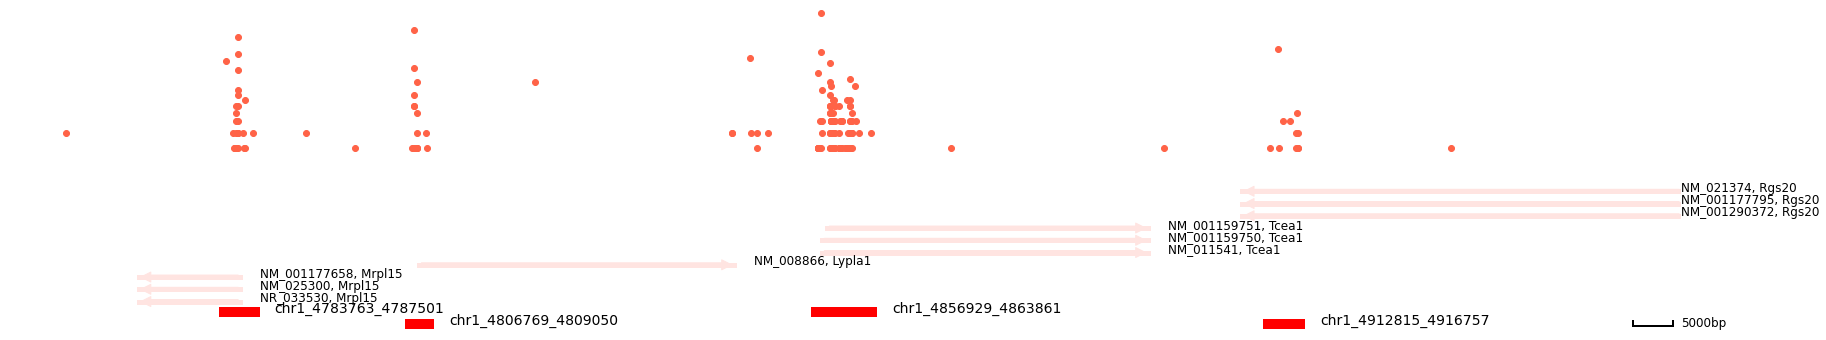

In [6]:
cc.pl.draw_area("chr1",4856929,4863861,100000,peak_data, Brd4, "mm10", 
                figsize = (30,6),peak_line = 2,save = False, example_length = 5000)

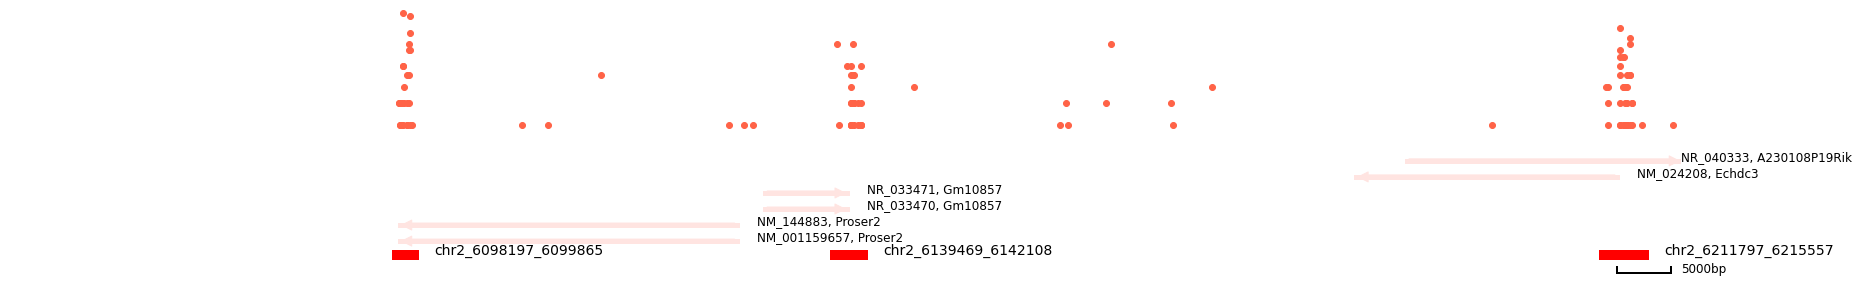

In [7]:
cc.pl.draw_area("chr2",6136575,6144043,75000, peak_data, Brd4, "mm10", 
                figsize = (30,5),peak_line = 1,save = False, example_length = 5000)

The above approach is first combine the data and then call peaks together. Although not recommended, you could also try call peaks seperately and then merge the peaks by pybedtools. Below are the codes:

```python
import pybedtools
peak_data1 = cc.pp.callpeaks(F6_Brd4,  method = "test", reference = "mm10", pvalue_cutoffbg = 0.1, maxbetween = 2000,
                  pvalue_cutoffTTAA = 0.001, lam_win_size = 1000000,  pseudocounts = 0.1, record = True)
peak_data2 = cc.pp.callpeaks(M6_Brd4,  method = "test", reference = "mm10",  pvalue_cutoffbg = 0.1, maxbetween = 2000,
                  pvalue_cutoffTTAA = 0.001, lam_win_size = 1000000,  pseudocounts = 0.1, record = True)
peak = cc.rd.combine_ccf([peak_data1,peak_data2])
peak = pybedtools.BedTool.from_dataframe(peak).merge().to_dataframe() 
peak_data = peak.rename(columns={"chrom":"Chr", "start":"Start", "end":"End"})
```

In [8]:
cc.pp.annotation(peak_data, reference = "mm10")

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,3514354,3517037,NM_001011874,Xkr4,NM_001195662,Rp1
1,chr1,4196845,4200095,NM_001195662,Rp1,NM_011283,Rp1
2,chr1,4213840,4217642,NM_001195662,Rp1,NM_011283,Rp1
3,chr1,4783763,4787501,NR_033530,Mrpl15,NM_008866,Lypla1
4,chr1,4806769,4809050,NM_008866,Lypla1,NR_033530,Mrpl15
...,...,...,...,...,...,...,...
22980,chrY,1009770,1011742,NM_012011,Eif2s3y,NR_027507,Tspy-ps
22981,chrY,1241882,1246464,NM_009484,Uty,NM_012008,Ddx3y
22982,chrY,1267935,1271185,NM_012008,Ddx3y,NM_009484,Uty
22983,chrY,1282449,1287505,NM_012008,Ddx3y,NM_148943,Usp9y


In [9]:
peak_data

,Chr,Start,End,Experiment Hops,Reference Hops,Expected Hops,pvalue
0,chr1,3514354,3517037,5,24,0.148659,1.319915e-08
1,chr1,4196845,4200095,13,25,0.208190,0.000000e+00
2,chr1,4213840,4217642,5,23,0.199920,7.473307e-08
3,chr1,4783763,4787501,27,31,1.185859,0.000000e+00
4,chr1,4806769,4809050,16,21,0.835582,1.110223e-16
...,...,...,...,...,...,...,...
22980,chrY,1009770,1011742,17,22,0.478808,0.000000e+00
22981,chrY,1241882,1246464,23,50,0.870485,0.000000e+00
22982,chrY,1267935,1271185,5,27,0.520359,1.768918e-05
22983,chrY,1282449,1287505,25,60,1.035953,0.000000e+00


Find out the closest genes for each peak to annotate.

In [10]:
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10")
peak_annotation = cc.pp.combine_annotation(peak_data,peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Experiment Hops,Reference Hops,Expected Hops,pvalue,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,3514354,3517037,5,24,0.148659,1.319915e-08,NM_001011874,Xkr4,NM_001195662,Rp1
1,chr1,4196845,4200095,13,25,0.208190,0.000000e+00,NM_001195662,Rp1,NM_011283,Rp1
2,chr1,4213840,4217642,5,23,0.199920,7.473307e-08,NM_001195662,Rp1,NM_011283,Rp1
3,chr1,4783763,4787501,27,31,1.185859,0.000000e+00,NR_033530,Mrpl15,NM_008866,Lypla1
4,chr1,4806769,4809050,16,21,0.835582,1.110223e-16,NM_008866,Lypla1,NR_033530,Mrpl15
...,...,...,...,...,...,...,...,...,...,...,...
22980,chrY,1009770,1011742,17,22,0.478808,0.000000e+00,NM_012011,Eif2s3y,NR_027507,Tspy-ps
22981,chrY,1241882,1246464,23,50,0.870485,0.000000e+00,NM_009484,Uty,NM_012008,Ddx3y
22982,chrY,1267935,1271185,5,27,0.520359,1.768918e-05,NM_012008,Ddx3y,NM_009484,Uty
22983,chrY,1282449,1287505,25,60,1.035953,0.000000e+00,NM_012008,Ddx3y,NM_148943,Usp9y


Use ccf data, peak data and barcodes data to make a sample by peak anndata object.

In [11]:
adata_ccf = cc.pp.makeAnndata(Brd4, peak_annotation, ["F6_Brd4","M6_Brd4"], key = 'sample')
adata_ccf

AnnData object with n_obs × n_vars = 2 × 22985
    var: 'Chr', 'Start', 'End', 'Experiment Hops', 'Reference Hops', 'Expected Hops', 'pvalue', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Although one peak should have many htops, but there is a chance that all the cells from the peak was filtered by the RNA preprocesssing. In this case, we advice to filter the peaks. 

In [12]:
cc.pp.filter_peaks(adata_ccf, min_counts=5)
adata_ccf

AnnData object with n_obs × n_vars = 2 × 22985
    var: 'Chr', 'Start', 'End', 'Experiment Hops', 'Reference Hops', 'Expected Hops', 'pvalue', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2', 'n_counts'

In [13]:
adata_ccf.obs

""
Index
F6_Brd4
M6_Brd4


Differential binding analysis would find out the significant binding for each cluster.

In [14]:
cc.tl.rank_peak_groups(adata_ccf,"Index",method = 'fisher_exact',key_added = 'fisher_exact')

Plot the results for differential binding analysis.

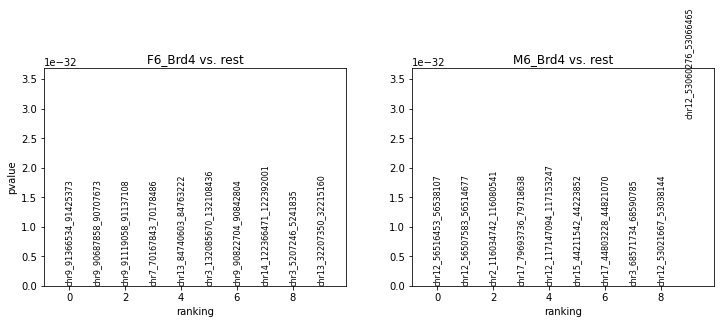

In [15]:
cc.pl.rank_peak_groups(adata_ccf, key = 'fisher_exact')

Take a look at the genome for highly differentiated peaks is strongly adviced.

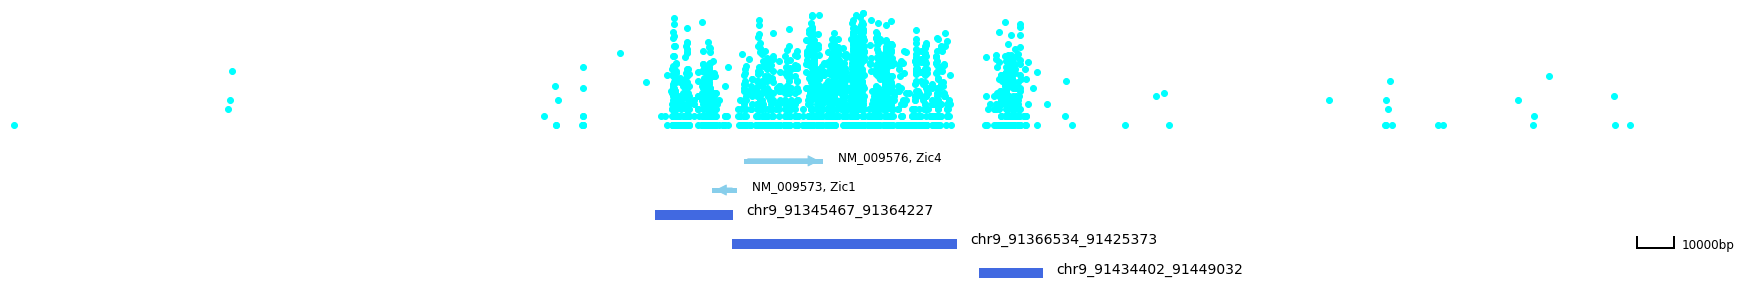

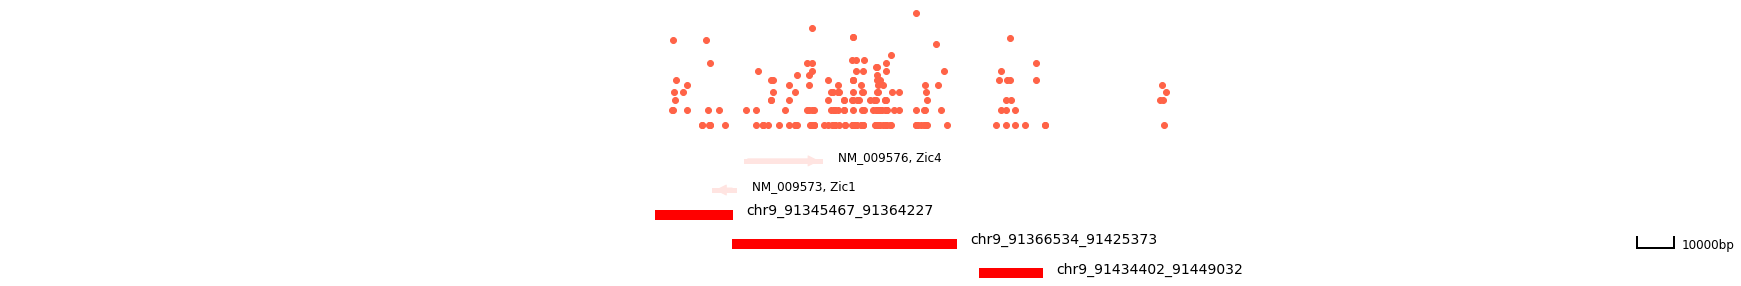

In [16]:
cc.pl.draw_area("chr9",91366534,91425373,200000,peak_data,Brd4,"mm10",adata = adata_ccf, 
                name = "F6_Brd4",key = "Index",htopkey = "sample", figsize = (30,5),peak_line = 3,color = "blue")
cc.pl.draw_area("chr9",91366534,91425373,200000,peak_data, Brd4,"mm10",adata = adata_ccf, 
                name = "M6_Brd4",key = "Index", htopkey = "sample", figsize = (30,5),peak_line = 3)

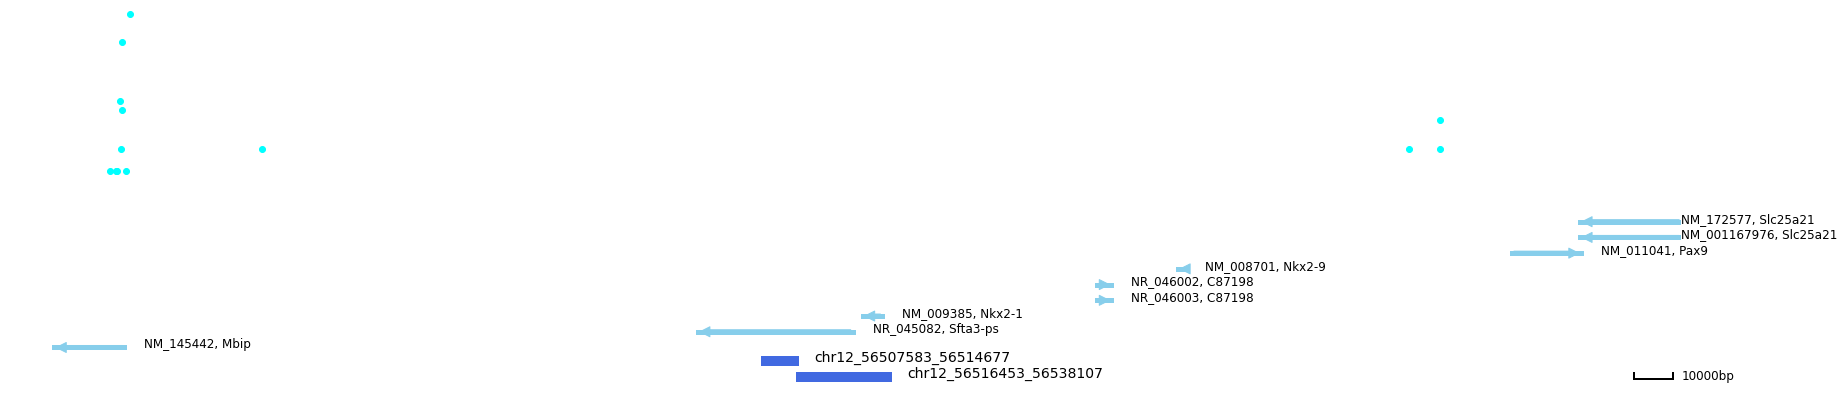

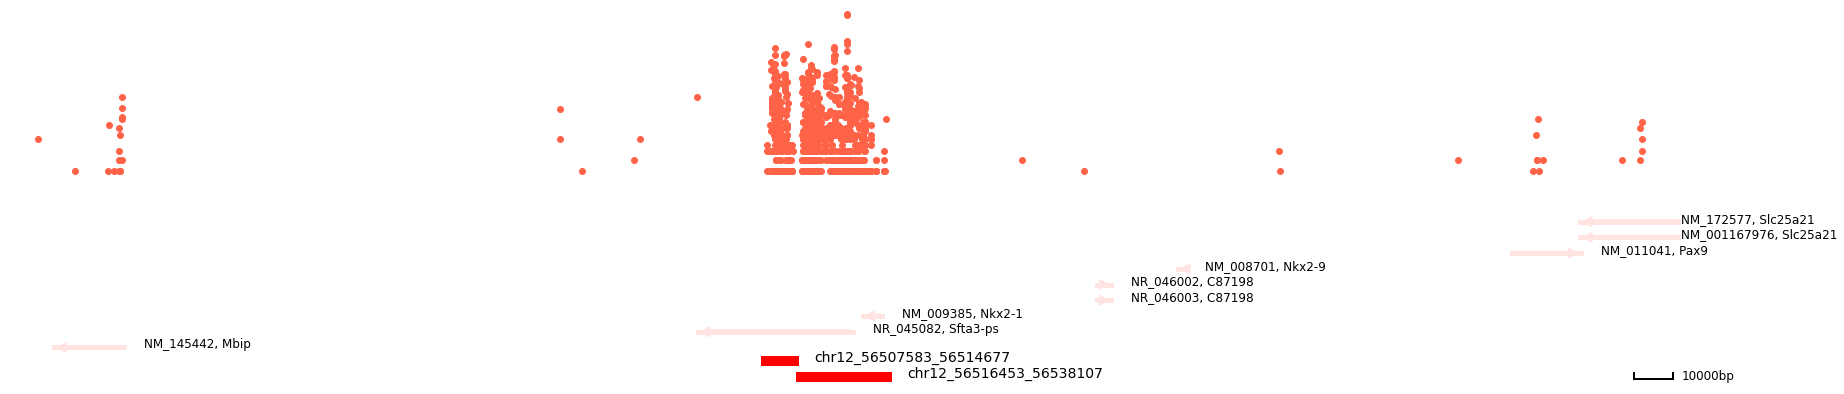

In [17]:
cc.pl.draw_area("chr12",56516453,56538107,200000,peak_data,Brd4,"mm10",adata = adata_ccf, 
                name = "F6_Brd4",key = "Index",htopkey = "sample", figsize = (30,7),peak_line = 3,color = "blue")
cc.pl.draw_area("chr12",56516453,56538107,200000,peak_data, Brd4,"mm10",adata = adata_ccf, 
                name = "M6_Brd4",key = "Index", htopkey = "sample", figsize = (30,7),peak_line = 3)

Saved the file if needed.

In [18]:
adata_ccf.write("Brd4_bindings_bulk.h5ad")